# Анализ результатов А/В теста

Цель исследования:
  - Произвести приоритизацию гипотез для увеличения выручки интернет-магазина, подготовленных совместно с отделом маркетинга.
  - Произвести анализ проведенного А/В теста, сделать выводы о его результате.

План исследования:
1. [Загрузка данных](#start)
    - [Изучение общей информации о датасете](#1.1) 
    - [Предобработка](#1.2) 
    - [Приоритизация гипотез](#1.3) 
    - [Вывод по разделу](#1.4) 
2. [Анализ А/В теста](#preprocessing) 
   - [График кумулятивной выручки по группам](#2.1)
   - [График кумулятивного среднего чека по группам](#2.2)  
   - [График относительного изменения кумулятивного среднего чека группы B к группе A](#2.3)
   - [График кумулятивного среднего количества заказов на посетителя по группам](#2.4)
   - [График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A ](#2.5)  
   - [Точечный график количества заказов по пользователям](#2.6)   
   - [95-й и 99-й перцентили количества заказов на пользователя](#2.7)
   - [точечный график стоимостей заказов](#2.8)  
   - [95-й и 99-й перцентили стоимости заказов](#2.9)   
   - [Статистическая значимость различий в среднем количестве заказов по «сырым» данным](#2.10)
   - [Статистическая значимость различий в среднем чеке заказа  по «сырым» данным](#2.11)  
   - [Статистическая значимость различий в среднем количестве заказов по «очищенным» данным](#2.12)   
   - [Статистическая значимость различий в среднем чеке заказа по «очищенным» данным](#2.13)
2. [Общий вывод](#conclusion)    
   


Загрузим необходимые библиотеки

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import math
import plotly.express as px
import scipy.stats as stats
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Cursor
pd.set_option('display.max_colwidth', False)

Выполним загрузку данных <a id="start"></a>

In [2]:
# загружаем датафреймы
try:
    hypo = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypo = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv') 

Посмотрим на наши данные <a id="1.1"></a>

In [3]:
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведем название столбцов к "змеиному регистру" <a id="1.2"></a>

In [4]:
hypo.columns = hypo.columns.str.lower()

In [5]:
hypo

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Таблица небольшая и мы видим, что у нас нет ни пропусков ни дубликатов, но все же запустим проверку

In [6]:
def check_missing_and_duplicates(df):
    num_missing = df.isnull().sum().sum()
    num_duplicates = df.duplicated().sum()
    if num_missing == 0:
        print("Пропусков не найдено.")
    else:
        print(f"Найдено {num_missing} пропусков в DataFrame.")
     
    if num_duplicates == 0:
        print("Дубликатов не найдено.")
    else:
        print(f"Найдено {num_duplicates} дубликатов в DataFrame.")

In [7]:
check_missing_and_duplicates(hypo)

Пропусков не найдено.
Дубликатов не найдено.


<a id="1.3"></a> 
## Часть 1.  Приоритизация гипотез. 

Применим фреймворк ICE для приоритизации гипотез. Отсортируйем их по убыванию приоритета.

In [8]:
hypo['ICE'] = hypo['ICE'] = round((hypo['impact'] * hypo['confidence']) / hypo['efforts'], 2)
print(hypo[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))# напишите ваш код здесь 

                                                                                                     hypothesis  \
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстр

После приоритизации гипотез фреймворком ICE на первое место вышла гипотеза №8, у которой одинаково высокие impact и	confidence и средний efforts. Далее гипотеза №0, так как у нее выше	efforts. И на третьем месте №7.

Применим фреймворк RICE для приоритизации гипотез. Отсортируйем их по убыванию приоритета.

In [9]:
hypo['RICE'] = round((hypo ['impact'] * hypo ['reach'] * hypo ['confidence']) / hypo ['efforts'], 2)
print(hypo[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

<a id="1.4"></a>
После приотизации гипотез при применении фреймворка RICE на первое место вышла гипотеза  под номером 7. Различие методов RICE и ICE, в том, что при методе RICE учитывается охват пользователей reach, а отдел маркетинга оценил охват пользователей при данном изменении на самый высокий балл. Так же гипотеза номер 2 заняла второе по значимости место. А вот гипотеза 8 спустилась до пятого.

<a id="preprocessing"></a>
## Часть 2. Анализ A/B-теста 

Мы провели A/B-тест и получили результаты, которые записаны в файлах. Загрузим данные и посмотрим на них. 

In [10]:
# загружаем датафреймы
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv') 


In [11]:
# загружаем датафреймы
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv') 

In [12]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Посмотрим общую информацию о датафрейме orders (датафрейм с информацией о заказах, выручке и группы А/В теста пользователей)

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В нашей таблице 5 столбцов и 1197 строк, тип данных столбца date не соответствует дате.

Проверим данные на пропуски и дубликаты

In [14]:
check_missing_and_duplicates(orders)

Пропусков не найдено.
Дубликатов не найдено.


Приведем названия столбцов к змеиному регистру и изменим тип данных столбца date

In [15]:
# Переименование колонок
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

# Приведение типа данных в формат даты
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%dT')


Проверим, что получилось

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Теперь все в порядке

Выведем таблицу visitors (данные о принадлежности пользоватетй группам А/В теста) и посмотрим на общую информацию о ней.

In [17]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице 3 столбца и 62 строки. Тип данныз столбца date не соответствует дате.

Проверим данные на пропуски и дубликаты

In [19]:
check_missing_and_duplicates(visitors)

Пропусков не найдено.
Дубликатов не найдено.


Так же приведем столбец date  к формату даты

In [20]:
# Приведение типа данных в формат даты
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%dT')

Проверим, что получилось

In [21]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Теперь все в порядке.

Начнем анализ А/В теста. 
<a id="2.1"></a>
### Построим график кумулятивной выручки по группам. 

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 
date — дата;
group — группа A/B-теста (A или B);
orders — кумулятивное количество заказов на указанную дату в указанной группе;
buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): 

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные кумулятивные по дням данные о заказах.

In [23]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [24]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов

In [25]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Построим графики кумулятивной выручки по дням и группам A/B-тестирования

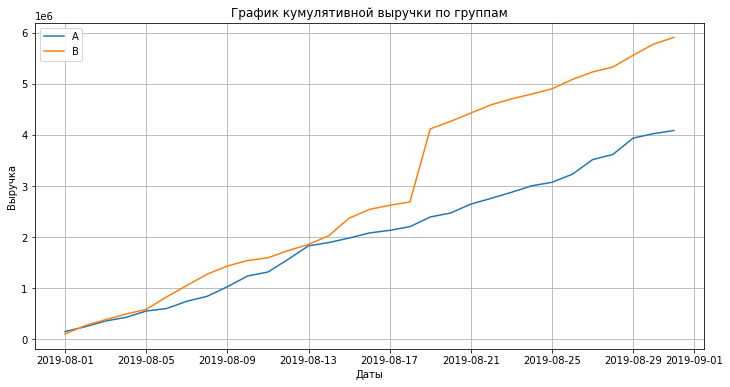

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.legend()
plt.grid(True)
plt.show()

Выручка равномерно увеличивается в течение всего теста, кроме одного промежутка времени с 18 августа по 19 августа, наблюдается резкий скачок данных о выручке группы В. Это либо резкое увеличение числа заказов, либо какие-то очень дорогие заказы были оформлены в этот период.

<a id="2.2"></a>
### Построим график кумулятивного среднего чека по группам. 

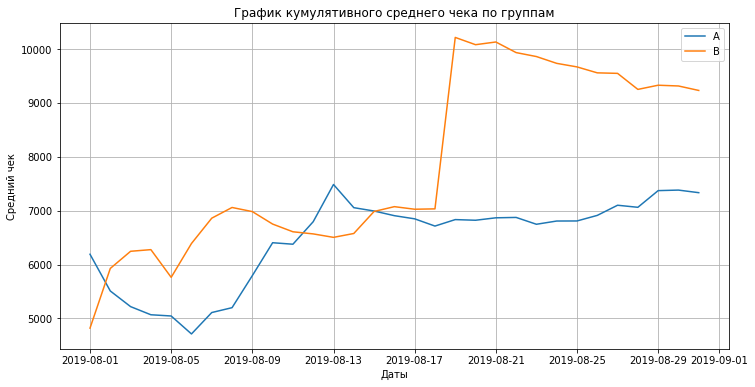

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel("Даты")
plt.ylabel("Средний чек")
plt.legend()
plt.grid(True)
plt.show()

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Видимо, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. В основном на всем протяжении теста средний чек группы В превосходит средний чек группы А, хотя в период с 11 сентября по 13 сентября наблюдается падение среднего чека в группы В и, наоборот, увеличение у группы А.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 
<a id="2.3"></a>

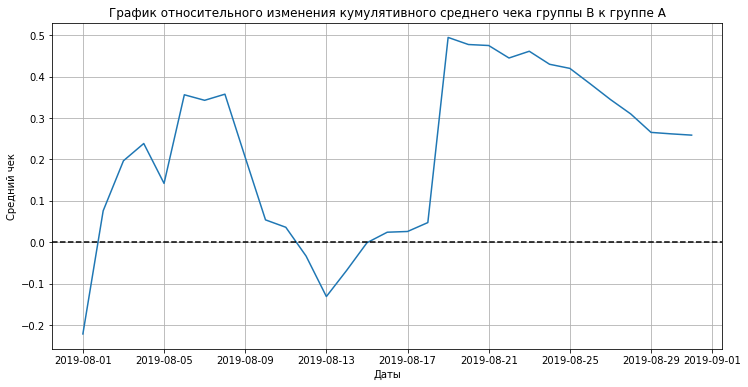

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel("Даты")
plt.ylabel("Средний чек")
plt.grid(True)
plt.show()

В нескольких точках график различия между сегментами резко «скачет». В целом кумулятивные данные о среднем чеке группы В превосходят кумулятивные данные о среднем чеке группы А.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. 
<a id="2.4"></a>

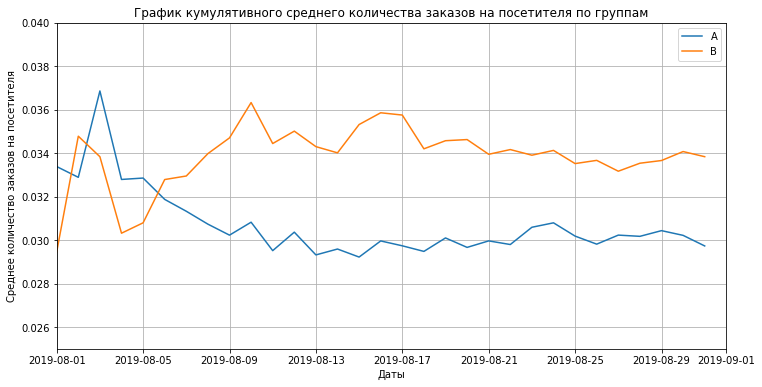

In [29]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12, 6))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime("2019-09-01"),0.025, 0.04])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel("Даты")
plt.ylabel("Cреднее количество заказов на посетителя")
plt.grid(True)
plt.show()

Получился симметричный график. Группы колебались около одного значения, но затем у группы В среднее количество заказов вырвалось вперёд и зафиксировалось, а у группы А — просело, но тоже зафиксировалось.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A 
<a id="2.5"></a>

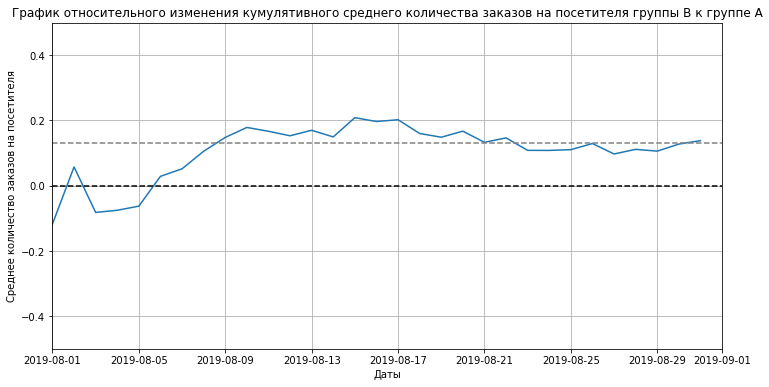

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime("2019-09-01"), -0.5, 0.5])
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel("Даты")
plt.ylabel("Cреднее количество заказов на посетителя")
plt.grid(True)
plt.show()

В начале теста группа B то проигрывала, то выигрывала группе A, затем вырвалась вперёд. В итоге можно сказать, что отношение среднего количества заказов на посетителя установилось на уровне 0,13

### Построим точечный график количества заказов по пользователям. Для этого подсчитаем количество заказов по пользователям 
<a id="2.6"></a>

In [31]:
ordersByUsers = orders.groupby('visitor_id').agg(orders = ('transaction_id','nunique')).reset_index().sort_values(by='orders', ascending=False)
ordersByUsers


,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


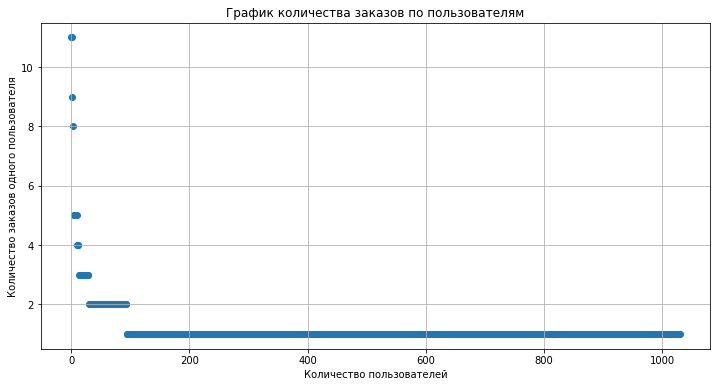

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel("Количество пользователей")
plt.ylabel("Количество заказов одного пользователя")
plt.grid(True)
plt.show()

Большинство пользователей делало по одному заказу, видим такие аномально большие данные, как 8-11 заказов на пользователя. Какое количество заказов нам считать аномальным, определим с помощью подсчета процентилей.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей. 
<a id="2.7"></a>

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И не более 1% пользователей заказывали более 4 раз. 
Разумно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней, так как выбросы единичные. 

### Построим точечный график стоимостей заказов. <a id="2.8"></a>

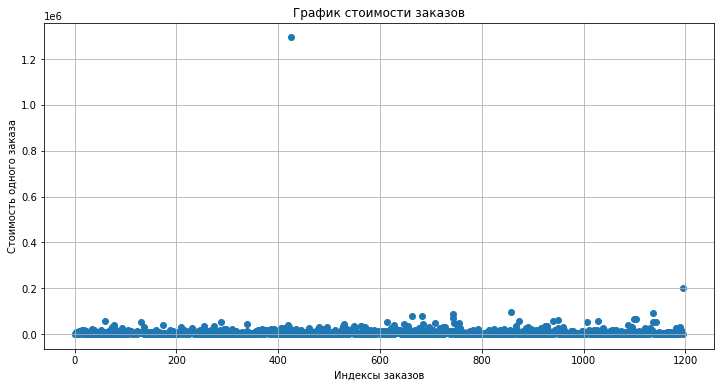

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.xlabel("Индексы заказов")
plt.ylabel("Стоимость одного заказа")
plt.grid(True)
plt.show()

Мы видим, что у нас есть аномально дорогие заказы, самый дорогой из которых стоимостью примерно 1,3 млн. Так же есть заказ стоимостью примерно 200 тыс и еще несколько от 50 тыс до 100 тыс. Определить, какую стоимость можно считать аномальной нам поможет подсчет процентилей.

Приблизим наш график, чтобы поподробнее изуть стоимость заказов

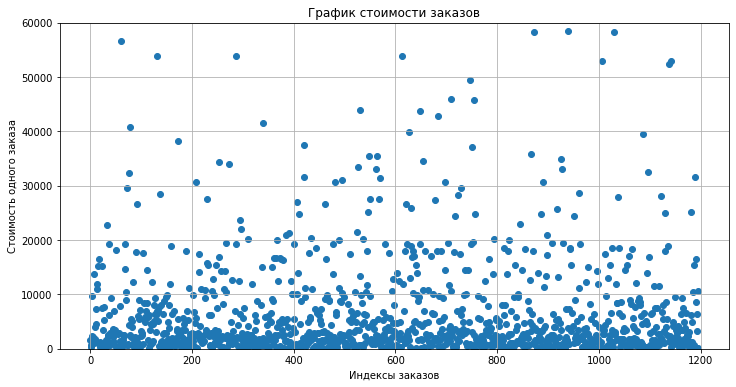

In [35]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.xlabel("Индексы заказов")
plt.ylabel("Стоимость одного заказа")
plt.grid(True)
plt.ylim(0,60000)
plt.show()         

Хоть и основная "масса" заказов по стоимости в пределах 20000, все же есть достаточное количество заказов в пределе от 20000 до 60000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
<a id="2.9"></a>

In [36]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% пользователей оформляли заказ на сумму более 28000. И не более 1% пользователей на сумму более 58233. Разумно выбрать сумму заказа 58233,2 за верхнюю границу стоимости заказов, и отсеять аномальных пользователей по ней, так как выбросы у нас точечные, много данных отфильтровывать не станем.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
<a id="2.10"></a>

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Уровень значимости возмем 0.05.

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


У нас получилась таблица со следующими столбцами:
date — дата;
ordersPerDateA — количество заказов в выбранную дату в группе A;
revenuePerDateA — суммарная выручка в выбранную дату в группе A;
ordersPerDateB — количество заказов в выбранную дату в группе B;
revenuePerDateB — суммарная выручка в выбранную дату в группе B;
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
visitorsPerDateA — количество пользователей в выбранную дату в группе A;
visitorsPerDateB — количество пользователей в выбранную дату в группе B;
visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами 'visitor_id', 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [38]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Мы выбираем метод Манна-Уитни, так как выше, в результате анализа данных мы получили информацию о том, что в наших данных присутствуют значительные выбросы, распределение по выручке не является нормальным. И в случае, когда в данных есть большие (по сравнению с нормальным распределением) выбросы, алгебраические метрики, работают плохо. При наличии выбросов в данных, результаты t-теста могут быть искажены. 

In [39]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
 

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [40]:
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]

# Вывод p-value
print("p-value: {0:.3f}".format(p_value))

# Вычисление и вывод отношения средних значений
mean_ratio = sampleB.mean() / sampleA.mean() - 1
print("Отношение средних значений: {0:.3f}".format(mean_ratio))

alpha = 0.05
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")

p-value: 0.017
Отношение средних значений: 0.138
Отвергаем нулевую гипотезу: между группами есть разница


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
<a id="2.11"></a>

Сформулируем гипотезы. Нулевая: различий в среднем чеке заказа между группами нет. Альтернативная: различия в среднем чеке заказа между группами есть. Уровень значимости возмем 0.05.

Для этого передадим критерию mannwhitneyu() данные о выручке с заказов. 
А ещё найдём относительные различия в среднем чеке между группами:

In [41]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
mean_ratio = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
# Вывод p-value и mean_ratio
print("p-value: {0:.3f}".format(p_value))
print("Отношение средних значений: {0:.3f}".format(mean_ratio))
# Условие для отвержения нулевой гипотезы
alpha = 0.05
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")

p-value: 0.729
Отношение средних значений: 0.259
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы А значительно ниже среднего чека группы В.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
<a id="2.12"></a>

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 58233,2 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 1%  пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233,2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [42]:
# Находим 99-й процентили и сохраняем в переменные 
revenue_99th_percentile = orders['revenue'].quantile(0.99)
orders_99th_percentile = ordersByUsers['orders'].quantile(0.99)

# Используем полученное значение для фильтрации
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_99th_percentile]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_99th_percentile]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_99th_percentile]['visitor_id']

# Объединяем и удаляем дубликаты
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295 
949     887908475 
744     888512513 
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64
15


У нас получилось 15 аномальных пользователя

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [43]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [44]:
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
# Вывод p-value
print("p-value: {0:.3f}".format(p_value))
# Вычисление и вывод отношения средних значений
mean_ratio = sampleBFiltered.mean() / sampleAFiltered.mean() - 1
print("Отношение средних значений: {0:.3f}".format(mean_ratio))
alpha = 0.05
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")

p-value: 0.014
Отношение средних значений: 0.153
Отвергаем нулевую гипотезу: между группами есть разница


Напомним результаты теста по сырым данным - p-value: 0.017, отношение средних значений: 0.138. P-value уменьшилось еще больше, а отношение средних значений увеличилось.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
<a id="2.13"></a>

In [45]:
# Вычисление p-value
p_value = stats.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue'],
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue'],
)[1]

# Вывод p-value
print("p-value: {0:.3f}".format(p_value))

# Вычисление и вывод отношения средних значений
mean_ratio = orders[
    np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
    )
]['revenue'].mean() / orders[
    np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
    )
]['revenue'].mean() - 1

print("Отношение средних значений: {0:.3f}".format(mean_ratio))

# Условие для отвержения нулевой гипотезы
alpha = 0.05
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")


p-value: 0.851
Отношение средних значений: -0.006
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными


Напомним результаты теста по сырым данным - p-value: 0.729, отношение средних значений: 0.259. p-value сильно не изменилось, а вот отношение средних значений чеков сильно поменялось, по очищенным данным средний чек группы А немного превышает средний чек группы В.

## Выводы по исследованию: 
<a id="conclusion"></a>

Имеющиеся факты:
- Мы имеем статистически значимое различие по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий и после фильтрации это различие возрасло.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, но после очистки данных отношение средних чеков поменялось в пользу данных группы А;
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и есть тенденции к улучшению, и график различия среднего чека говорит о том, что результаты группы B лучше группы А. 
- Из всего выше сказанного сделаем вывод, что можно признать тест успешным, остановим тест и признаем победу группы В.